<a href="https://colab.research.google.com/github/TheArslan23/Portfolio/blob/master/INVENTROY%20OPETIMIZATION/INVENTROY_OPETIMIZATION_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inventory, Purchase, and Sales Analysis and Optimization

This project aims to enhance inventory management practices for Bibitor, LLC, a retail wine and spirits company operating across multiple locations. WBibitor, LLC manages sales and cost of goods sold that reach into the hundreds of millions, rendering traditional spreadsheets insufficient. The vast volume of data, which includes millions of sales, purchase, and inventory records, requires a sophisticated approach for effective analysis. the goal of this project is to leverage extensive data analysis to optimize inventory control and extract valuable insights from the company's operation, particularly sales and purchases.The project tasks are divided into two main objectives:


- Analyze the inventory management process and provide recommendations for optimization.
- Extract meaningful business insights from the data and provide actionable recommendations.

## Data Exploration and Cleaning

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading datasets
purchase_prices = pd.read_csv('PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL.csv')
end_inv = pd.read_csv('EndInvFINAL.csv')
invoice_purchases = pd.read_csv('InvoicePurchases.csv')
purchases = pd.read_csv('PurchasesFINAL.csv')
sales = pd.read_csv('SalesFINAL.csv')

In [3]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in purchase_prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice_purchases:
Approval    5169
dtype: int64

Missing values in purchases:
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

Missing values in sales:
Store             1
Brand             1
Description       1
Size              1
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64


In [4]:
#Explore the datasets
def explore_dataset(dataframe):
    summary = []
    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_count = len(dataframe[column])
        unique_count = dataframe[column].nunique()
        unique_sample = dataframe[column].unique()[0:10]
        missing_values = dataframe[column].isnull().sum()
        summary.append({'Column': column, 'Data Type': data_type, 'total count': total_count,
                        'Unique Count': unique_count, 'Unique Sample': unique_sample,
                        'Missing Values': missing_values})
    return pd.DataFrame(summary)

## Explore all dataset in one go-- make sure IDE displays maximum output with side scrolling.
datasets = [("Beginning Inventory", beg_inv),
            ("Ending Inventory", end_inv),
            ("Purchase", purchases),
            ("Purchase Invoices", invoice_purchases),
            ("Purchase Price", purchase_prices),
            ("Sales", sales)]

for index, (dataset_name, dataset) in enumerate(datasets, start=1):
    print(f"{index}. Explore {dataset_name} dataset key details:")
    print(explore_dataset(dataset))
    print("\n")

1. Explore Beginning Inventory dataset key details:
        Column Data Type  total count  Unique Count  \
0  InventoryId    object       206529        206529   
1        Store     int64       206529            79   
2         City    object       206529            67   
3        Brand     int64       206529          8094   
4  Description    object       206529          7291   
5         Size    object       206529            41   
6       onHand     int64       206529           474   
7        Price   float64       206529           329   
8    startDate    object       206529             1   

                                       Unique Sample  Missing Values  
0  [1_HARDERSFIELD_58, 1_HARDERSFIELD_60, 1_HARDE...               0  
1                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]               0  
2  [HARDERSFIELD, ASHBORNE, HORNSEY, EANVERNESS, ...               0  
3         [58, 60, 62, 63, 72, 75, 77, 79, 115, 120]               0  
4  [Gekkeikan Black & Gold Sake, Canadian 

In [5]:
# Handling missing values for purchase_prices dataset
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    purchase_prices = purchase_prices[purchase_prices[col].notna()]

# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

# Handling missing values for invoice_purchases dataset
invoice_purchases['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases = purchases[purchases['Size'].notna()]

datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")

<ipython-input-5-42be408dbccd>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  end_inv['City'].fillna('Unknown', inplace=True)
<ipython-input-5-42be408dbccd>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using


No missing values in purchase_prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice_purchases.

Missing values in purchases:
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

Missing values in sales:
Store             1
Brand             1
Description       1
Size              1
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64


 Inventory Analysis:

In [6]:
# Grouping by Brand and Description and summarize inventory for beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Grouping by Brand and Description and summarize inventory for end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)

# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

print("Top 5 products at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products at the end of the year:\n", top_5_end)
print("\nBottom 5 products at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products at the end of the year:\n", bottom_5_end)

Top 5 products at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bottom 5 products at the end of the year:
 Brand  Descriptio

Sales Analysis

In [7]:
# Finding the best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Best selling ten products:\n{best_selling_products}\n")

# Finding the slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Slow-moving ten products:\n{slow_moving_products}")

Best selling ten products:
                                     SalesQuantity
Brand  Description                                
8111.0 Smirnoff 80 Proof                   13582.0
1892.0 Yukon Jack                          12302.0
3606.0 Smirnoff Raspberry Vodka            10260.0
4261.0 Capt Morgan Spiced Rum               9692.0
5111.0 Dr McGillicuddy's Mentholmnt         9106.0
3837.0 Skyy Vodka                           6920.0
4135.0 Smirnoff Blueberry Vodka             6648.0
4157.0 Smirnoff Green Apple Vodka           6285.0
3545.0 Ketel One Vodka                      5580.0
5491.0 Rumpleminze                          5329.0

Slow-moving ten products:
                                      SalesQuantity
Brand   Description                                
24411.0 Marques de Grinon 10 Cab Svg            1.0
17528.0 Dom Serene Roadblock Syrah              1.0
6968.0  Peter Vella Burgundy B/B                1.0
34982.0 Baron K Kabinett                        1.0
19754.0 BV Coastal Est

In [45]:
# Visualization and other setups
import matplotlib.pyplot as plt #
import seaborn as sns
import matplotlib_inline.backend_inline
from matplotlib.dates import DateFormatter
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

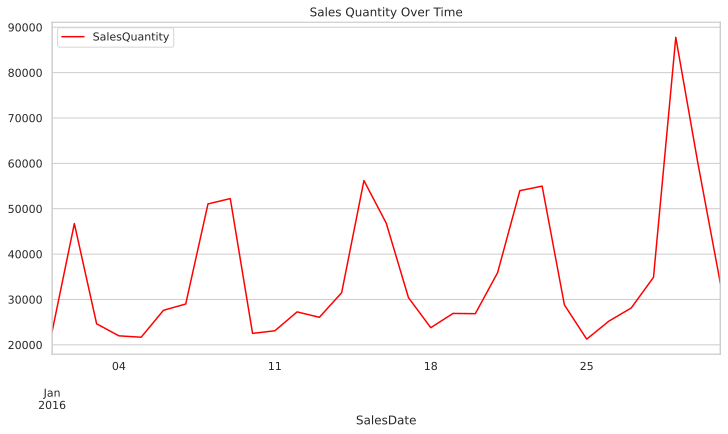

In [50]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})

sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time', color='RED')
plt.show()

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

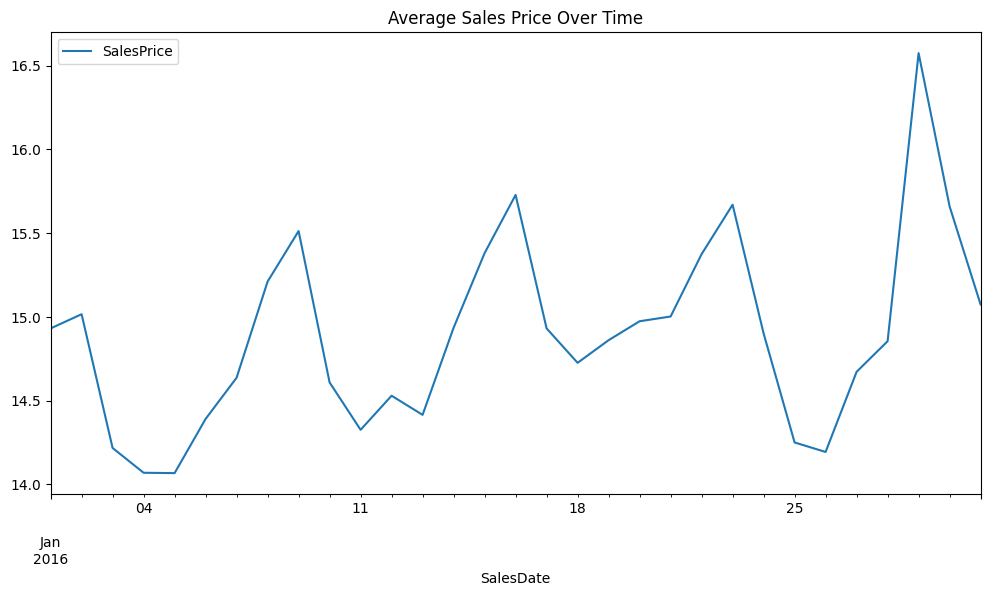

In [9]:
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time')

 Purchasing Analysis

In [10]:
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [11]:
vendor_purchase_cost = purchases.groupby('VendorName').agg({'PurchasePrice': 'sum'}).sort_values(by='PurchasePrice', ascending=False)
print("Top 10 Vendors by Purchase Cost:\n", vendor_purchase_cost.head(10))

Top 10 Vendors by Purchase Cost:
                              PurchasePrice
VendorName                                
DIAGEO NORTH AMERICA INC         486804.46
JIM BEAM BRANDS COMPANY          327236.03
PERNOD RICARD USA                264965.05
MARTIGNETTI COMPANIES            245358.01
ULTRA BEVERAGE COMPANY LLP       190066.32
CONSTELLATION BRANDS INC         173744.11
BROWN-FORMAN CORP                168646.57
E & J GALLO WINERY               167940.34
BACARDI USA INC                  165691.48
M S WALKER INC                   137980.97


Top Vendors by Purchase Cost:

DIAGEO NORTH AMERICA INC stands out as the top vendor with the highest purchase cost, amounting to 3,919,293.52 US dollars.
The following two vendors, 'JIM BEAM BRANDS COMPANY' and 'PERNOD RICARD USA', have notable purchase costs of 2,445,075.37 and 2,002,210.70, respectively.
It's interesting to see that the top 10 vendors have a significant difference in their purchase costs, with 'DIAGEO NORTH AMERICA INC' nearly leading by a margin of 1.5 million usd from the vendor in the second position.

In [12]:
# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are invalid date entries in the dataset. Please review the data.")
else:
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
    average_supply_duration = purchases['SupplyDuration'].mean()
    print("Average Supply Duration (in days):", average_supply_duration)

Average Supply Duration (in days): 7.740257733074096


In [13]:
purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

Average Payment Duration (in days): 35.56652303469423


In [15]:
Supply and Payment Durations

SyntaxError: invalid syntax (<ipython-input-15-339860a181e9>, line 1)

In [16]:
reduced_purchases = purchases[['VendorName', 'PurchasePrice']]
top_vendors = reduced_purchases.groupby('VendorName').sum()['PurchasePrice'].nlargest(10)
print(top_vendors)

VendorName
DIAGEO NORTH AMERICA INC       486804.46
JIM BEAM BRANDS COMPANY        327236.03
PERNOD RICARD USA              264965.05
MARTIGNETTI COMPANIES          245358.01
ULTRA BEVERAGE COMPANY LLP     190066.32
CONSTELLATION BRANDS INC       173744.11
BROWN-FORMAN CORP              168646.57
E & J GALLO WINERY             167940.34
BACARDI USA INC                165691.48
M S WALKER INC                 137980.97
Name: PurchasePrice, dtype: float64


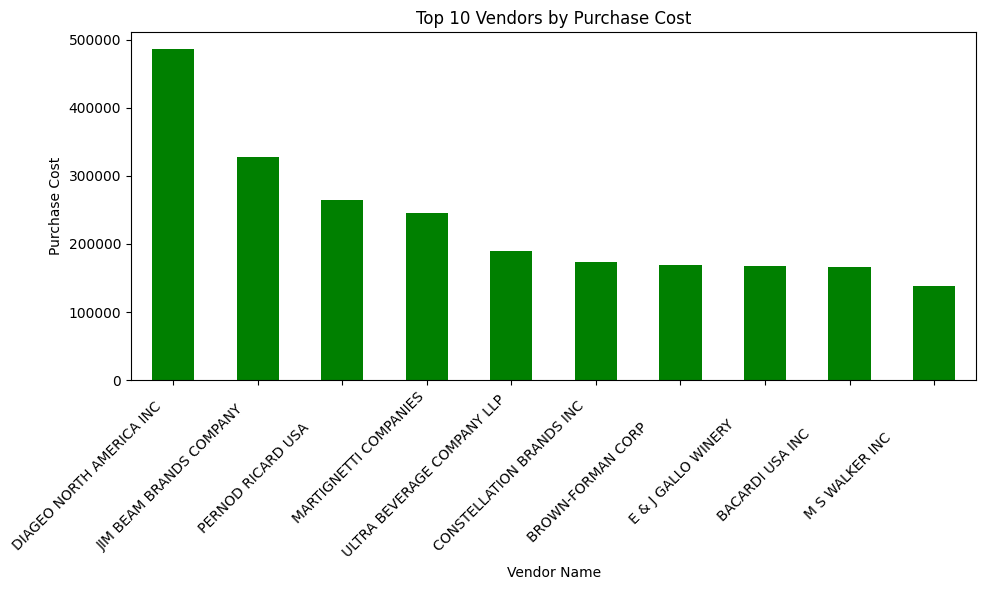

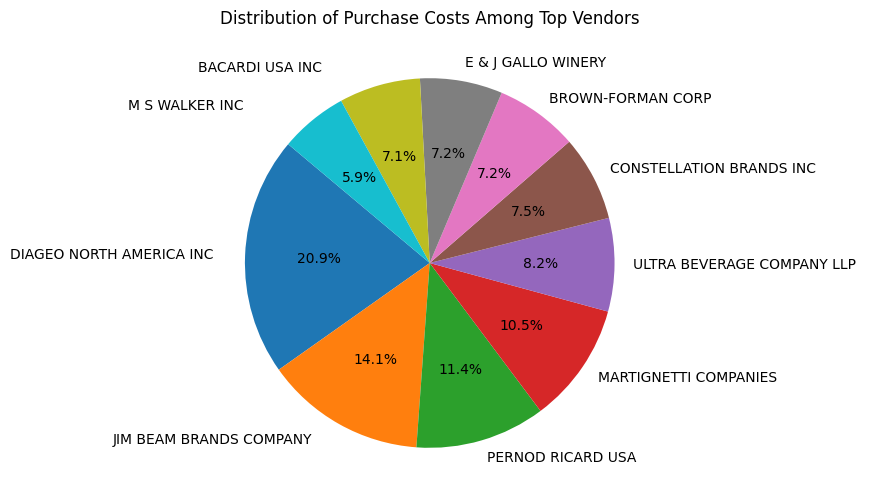

In [17]:
# Bar graph for top vendors by purchase cost
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='bar', color='green')
plt.title('Top 10 Vendors by Purchase Cost')
plt.ylabel('Purchase Cost')
plt.xlabel('Vendor Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Purchase Costs Among Top Vendors')
plt.ylabel('')  # to remove the default 'PurchasePrice' label from the y-axis
plt.show()

The bar chart illustrates the top 10 vendors by purchase cost. We observe that "DIAGEO NORTH AMERICA INC" clearly dominates, with a significantly higher purchase cost compared to others. The other vendors, like "JIM BEAM BRANDS COMPANY" and "PERNOD RICARD USA", have a more consistent distribution, showing a balanced spending across them.

Transitioning to the pie chart, which provides a distribution of purchase costs among top vendors, we get a more granular view. "DIAGEO NORTH AMERICA INC" accounts for 22.4% of the total purchase costs among the top vendors. The other vendors hold percentages ranging from 5.6% to 14%, indicating a more even distribution of costs among them.

In conclusion, while there's a dominant vendor in terms of purchase cost, the overall distribution among the top vendors is relatively even, with only a few outliers. This suggests a diversified vendor strategy, but with a few preferred partnerships.

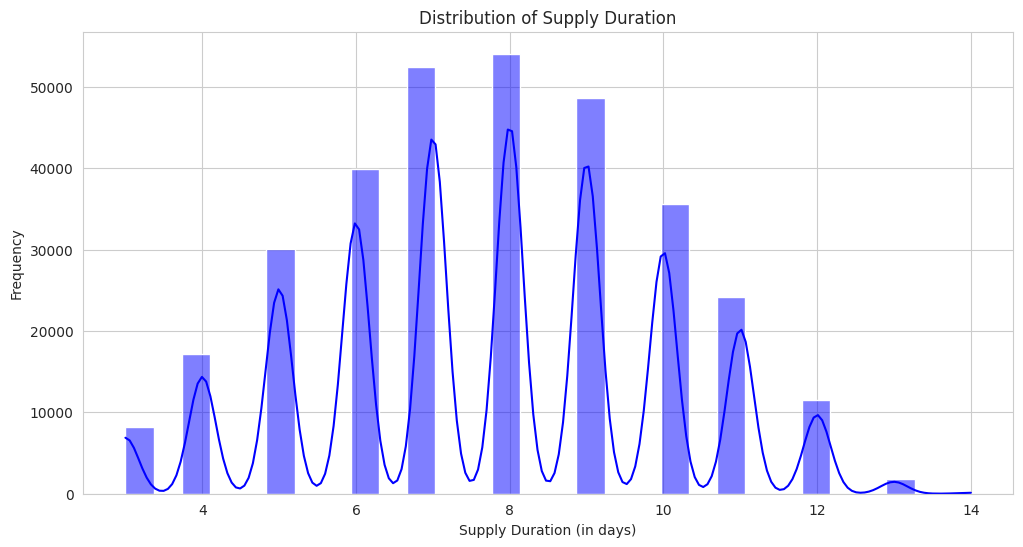

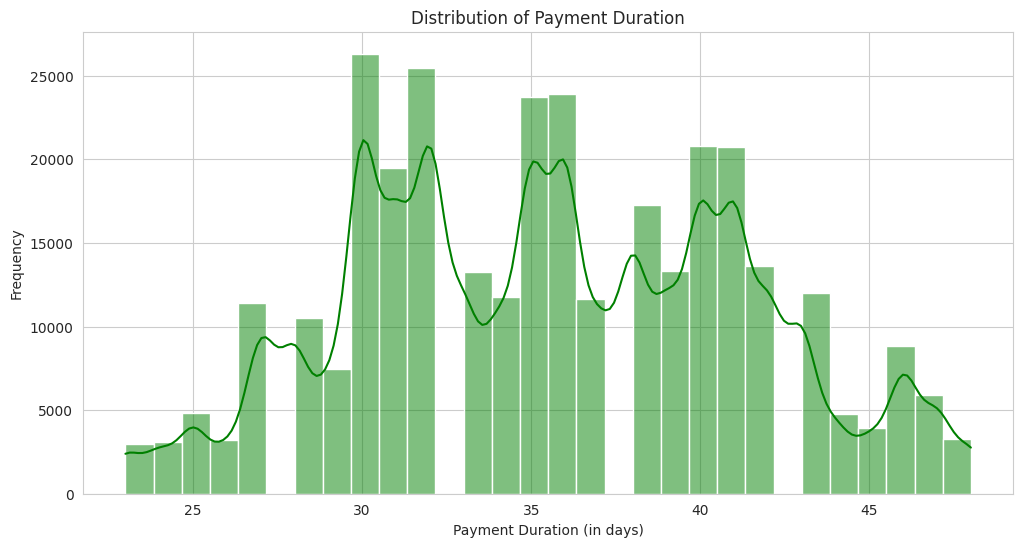

In [18]:
# Style settings
sns.set_style("whitegrid")

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color='blue')
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color='green')
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

 some observations,

The regular intervals observed in the supply duration chart suggest that there might be specific supply cycles or replenishment schedules that are adhered to.
Peaks in the supply distribution, particularly around 4, 6, 8, 10, and 12 days, might indicate standard supply contract durations or preferred restocking periods.
The oscillation in payment durations, especially between 25 to 45 days, suggests variability in the terms of payment or potential inconsistencies in payment execution.

In [19]:
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days

# Calculating Sales Velocity for each product
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days

purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()

In [20]:
# Merging the data
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# Calculating Optimal Stock Level
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

# Calculating Safety Stock using maximum sales for each product
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In [21]:
# Filtering products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# Getting the number of problematic products
num_problematic_products = len(problematic_products)

# Printing problematic products to the screen
print(f"There are {num_problematic_products} products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

There are 771 products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.
        Brand                   Description  Sales_Per_Day  Max_Daily_Sales
6        77.0   Three Olives Espresso Vodka      12.933333              8.0
7        79.0      Three Olives Loopy Vodka       5.733333              5.0
25      159.0     Glenmorangie Original VAP       2.333333              2.0
60      273.0      Sauza Extra Gold Tequila      11.633333              9.0
69      305.0   Crown Royal Canadian Whisky       9.900000              9.0
...       ...                           ...            ...              ...
6352  45822.0     Masciarelli Montepulciano      26.466667             25.0
6404  46379.0  Ghost Pine Cab Svgn LMartini      12.100000             10.0
6411  46447.0         Gascon Malbec Mendoza      20.500000             12.0
6413  46458.0      Layer Cake Barosa Shiraz       7.166667              7.0
6415  46476.0          Tilia Malbec Mendoza      22.300000          

In [24]:
# Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In [23]:
# Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

In an inventory management context, the Sales_Per_Day represents the average number of units sold per day, whereas the Max_Daily_Sales represents the highest number of units sold in a single day for a given product. Logically, the Max_Daily_Sales should never be lower than the Sales_Per_Day, as this would imply that the average daily sales are higher than the highest sales ever recorded for a single day, which is contradictory.

The occurrence of such a situation could be due to various reasons, including data entry errors, outliers, or computational errors. In our dataset, we observed that there were 555 products with this inconsistency.

<ipython-input-25-b43cf59563b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization


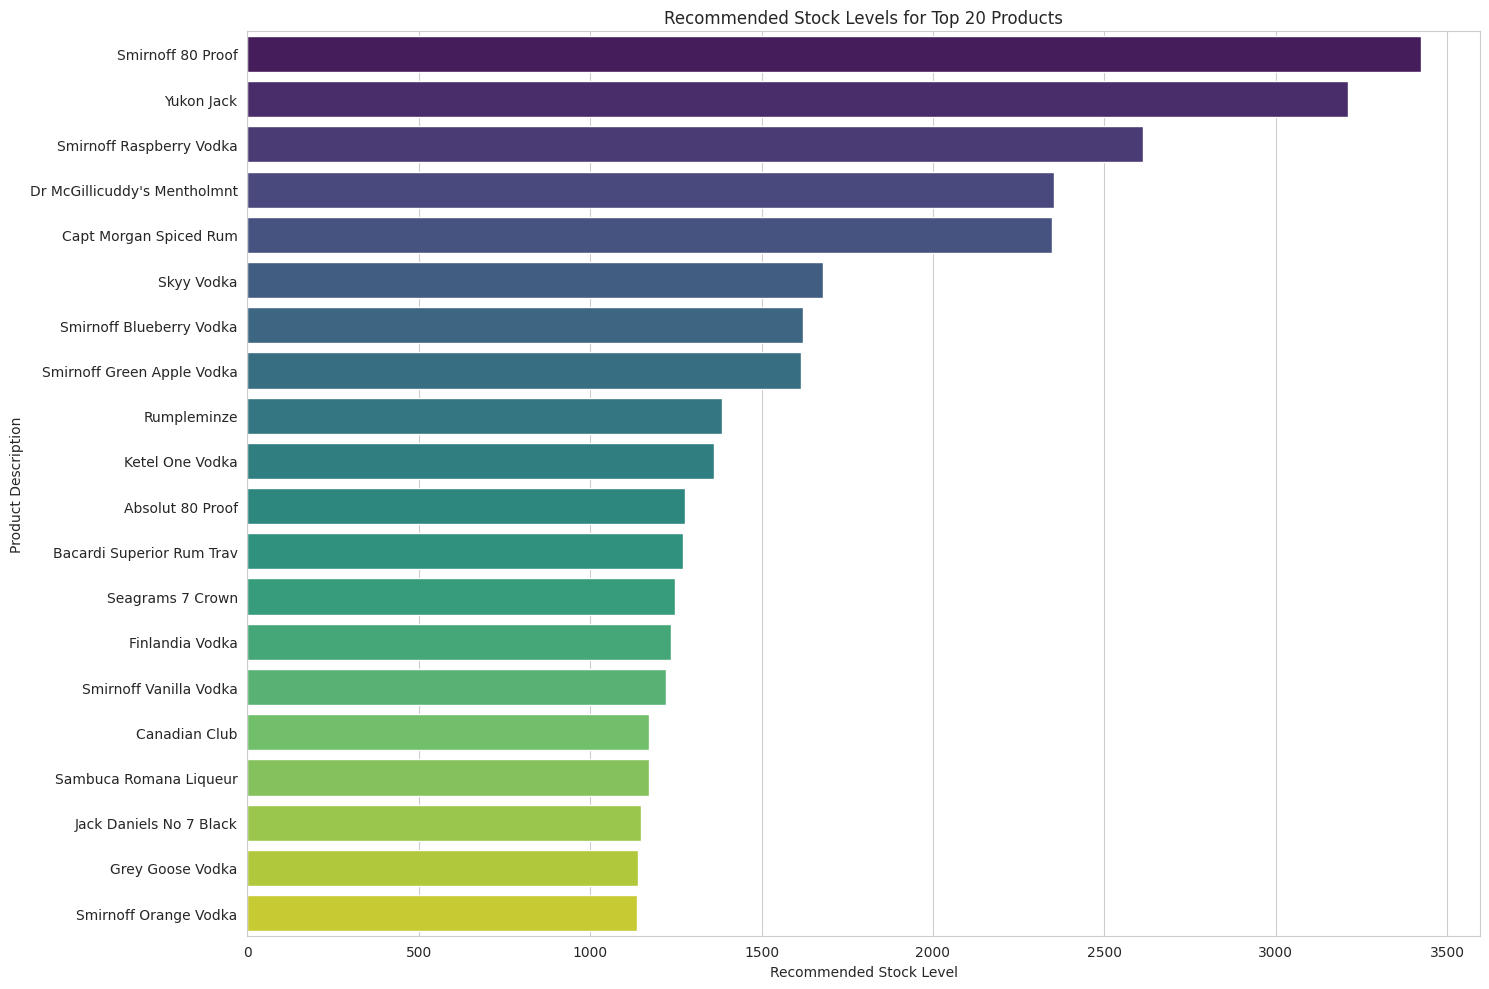

In [25]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.tight_layout()
plt.show()

The bar chart visually represents the recommended stock levels for the top 20 products. "Smirnoff 80 Proof" stands out as the product with the highest suggested stock level, indicating it has a high sales velocity and/or longer lead times.

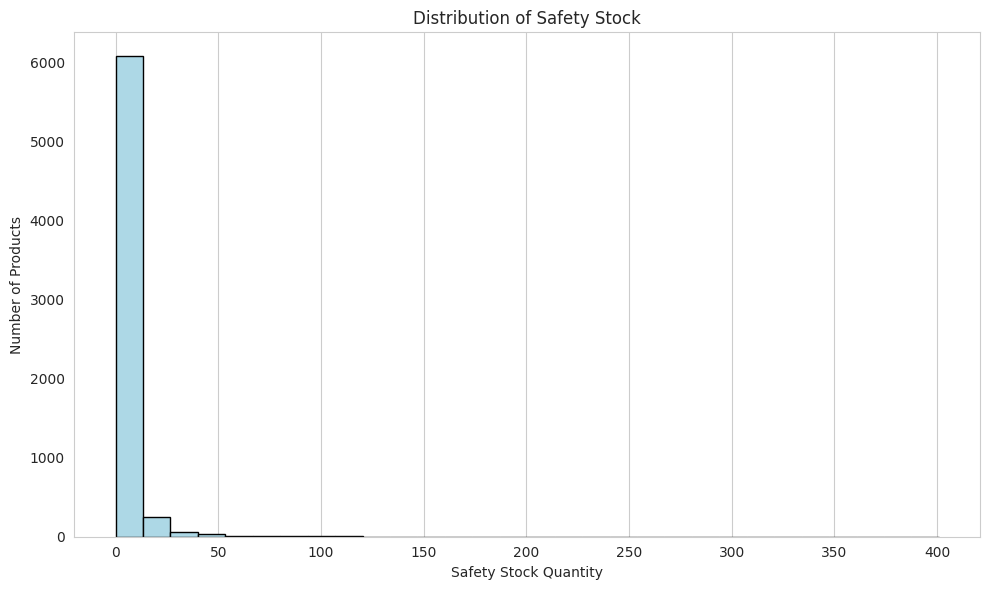

In [26]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

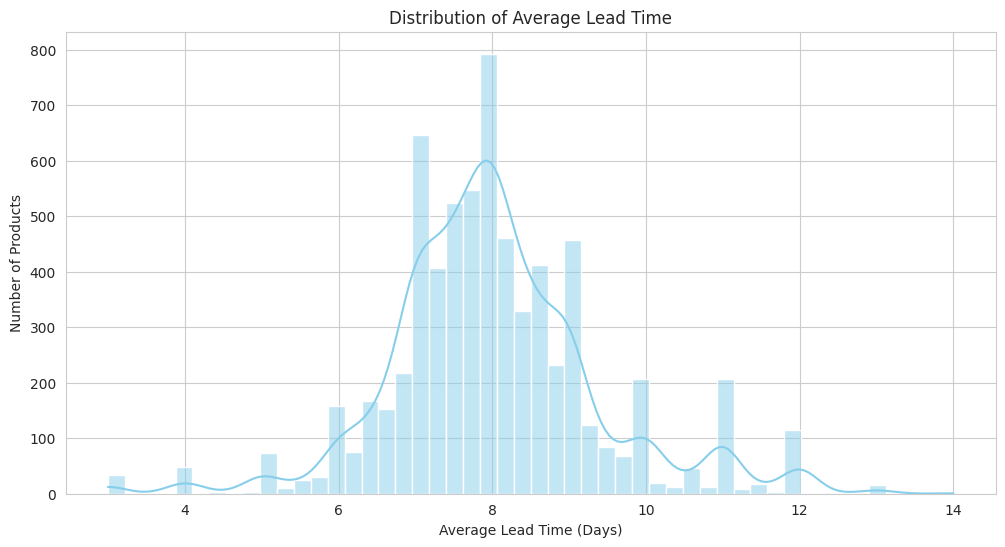

In [27]:
# Styling
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='skyblue', kde=True)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Number of Products')
plt.show()

The histogram illustrates the distribution of average lead times for products. The peak around 8 days suggests that most products have an average lead time of approximately 8 days. There are also some products with shorter or longer lead times, as seen in the spread between 4 to 14 days. The smooth line (Kernel Density Estimation) provides a clearer view of the distribution's shape, confirming the concentration around the 8-day mark.

<ipython-input-28-3cba567916d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')


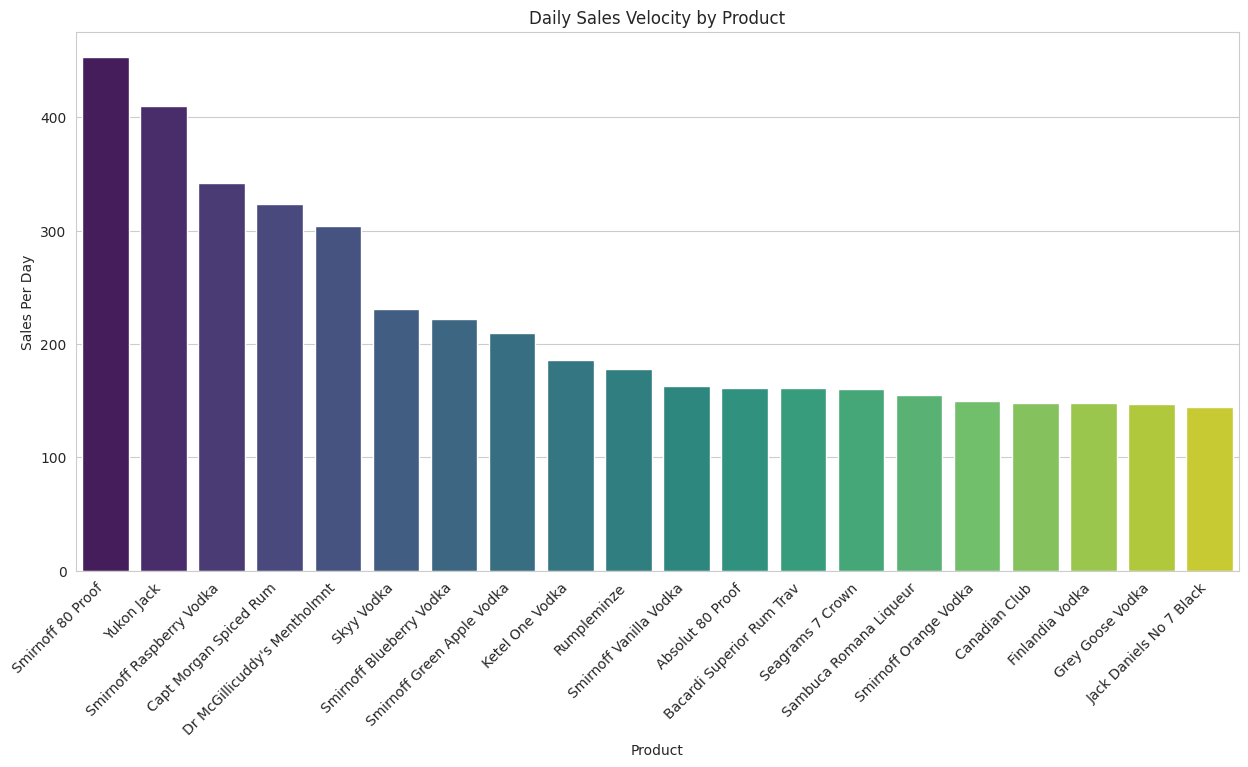

In [28]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # you can adjust the number as needed

# Creating the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.show()

Optimal Stock Level Calculation

In [29]:
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
latest_inventory_date = end_inv['endDate'].max()
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]

# Summarizing the current stock levels by product.
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()

# Merging the current stock levels with the previously calculated data.
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Assume zero current stock for any products not present in the current inventory.
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

        Brand                   Description  Current_Stock  \
0        58.0   Gekkeikan Black & Gold Sake          385.0   
1        60.0        Canadian Club 1858 VAP          146.0   
2        62.0      Herradura Silver Tequila          459.0   
3        63.0    Herradura Reposado Tequila          442.0   
4        72.0          No. 3 London Dry Gin          139.0   
...       ...                           ...            ...   
6463  90012.0   Ch Malartic Lagravier 12 RG           22.0   
6464  90013.0  Ch Leoville Barton 12 St Jul          130.0   
6465  90082.0  Ch Brane Cantenac Margaux 11            7.0   
6466  90087.0  Ch Mouton Rothschild 12 Paui           45.0   
6467  90089.0    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   26.819157             0.0  
1                   13.200000             0.0  
2                   17.735391             0.0  
3                   16.116162             0.0  
4              

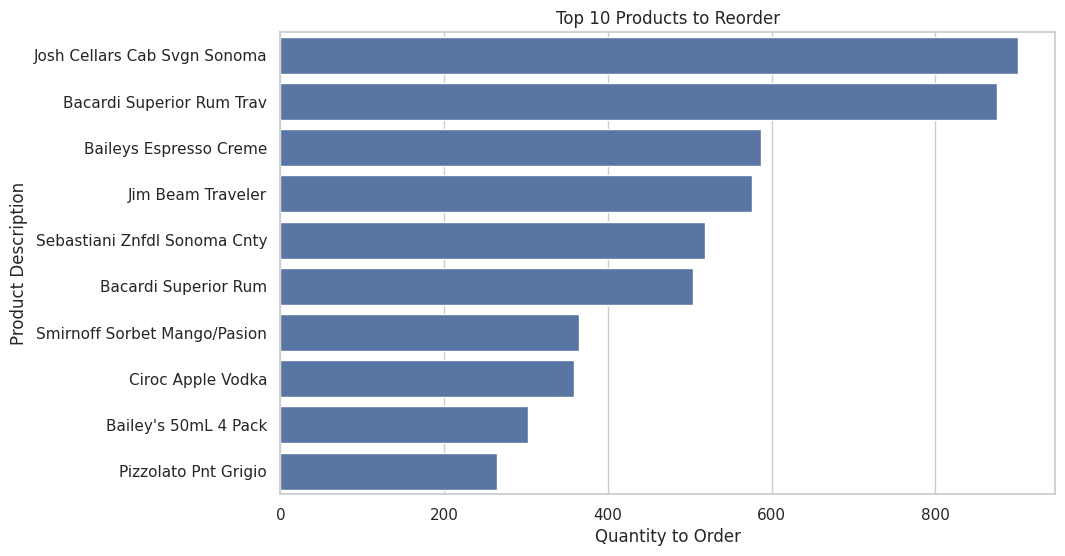

In [30]:
# Calculating how much of each product needs to be ordered if current stock is below recommended levels.
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Setting negative order quantities to zero.

# Reporting the results.
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])


# Creating a graph using Seaborn.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

The bar graph displays the top 10 products that need to be reordered based on inventory data. The products are sorted by the quantity that needs to be ordered, which is determined by the difference between the recommended stock levels and the current stock on hand. If the current stock is below the recommended level, the product appears on the list with the quantity to order represented on the x-axis.

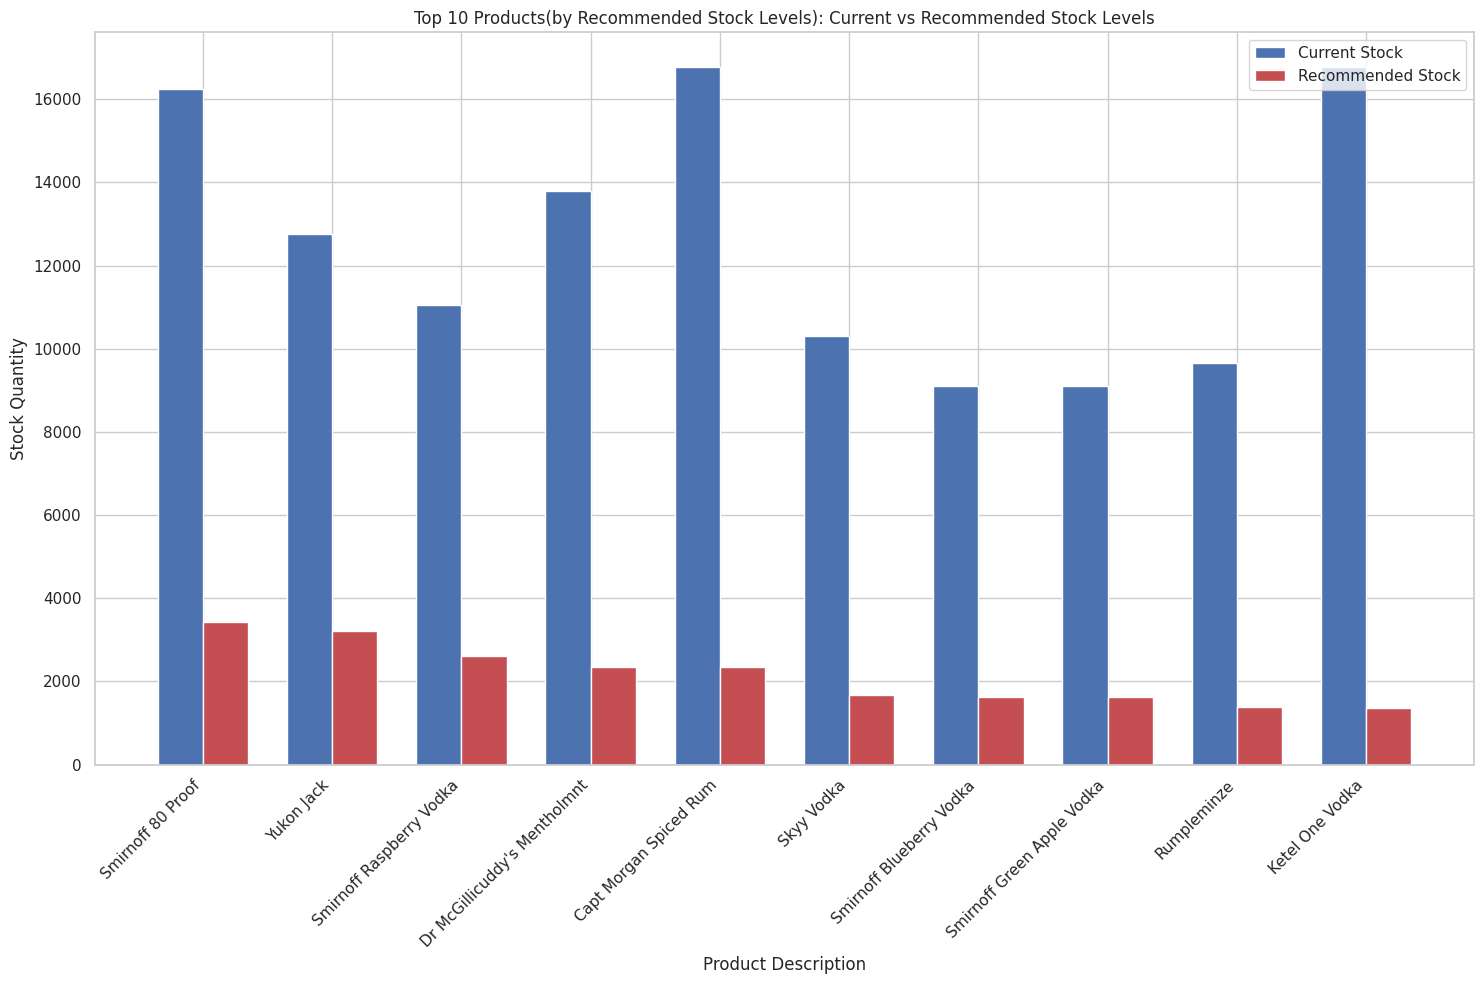

In [31]:
# Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a double-column bar chart
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Current Stock', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Recommended Stock', color='r')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products(by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

This inventory review highlights a significant surplus in the current stock levels when compared with the recommended stock levels for the top 10 products, sorted by the recommended quantity.

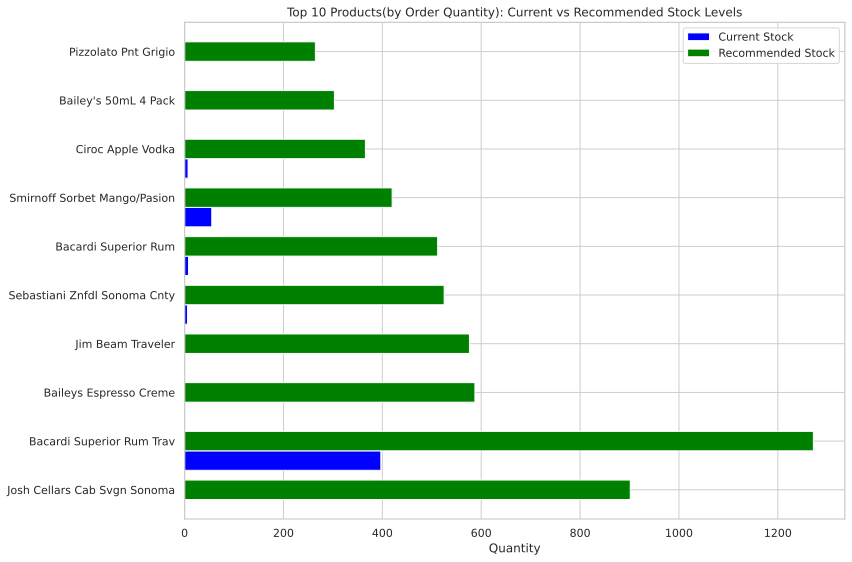

In [54]:
# Filtering the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Indexing for the bars
ind = np.arange(len(top_products_to_order))

# Width of the bars
bar_width = 0.4

# Plotting current stock and recommended stock side by side
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='blue', label='Current Stock')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='green', label='Recommended Stock')

# Setting the y-axis labels to product descriptions
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Adding the legend
ax.legend()

# Adding labels and title
ax.set_xlabel('Quantity')
ax.set_title('Top 10 Products(by Order Quantity): Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()

Conclusion

Top Products & Trends:

"Ketel One Vodka" soared from 4th to the top, hinting at surging demand.
"Capt Morgan Spiced Rum" finished a close second, just one unit behind.
"Smirnoff 80 Proof" held its ground despite a rebranding, shifting from number 3876 to 8111.
"Absolut 80 Proof" slightly dropped in rank, remaining strong.
Newcomer "Jack Daniels No 7 Black" broke into the top 5.
Inventory Challenges:

Zero inventory items at year's start and end suggest stocking or demand issues.
Low-stock items show unpredictable inventory levels.
Specialty items, like select wines, linger at the bottom, indicating niche demand.

The company should consider the following actions and suggestions:

Regularly review lead times and, if possible, work with vendors to reduce them, especially for products with longer lead times.
Maintain an adequate safety stock based on sales volumes and lead times to prevent stock shortages.
Reduce excess inventory for products that are not selling as expected to decrease inventory-holding costs.
Rebalance inventory for products with high sales but low stock.
Prioritize maintaining safety stock for category A items as they yield high sales.
Place immediate reorder requests for high-value products that require larger reorder amounts.
Regularly review the ABC categorization and adjust the inventory accordingly. Specifically, consider removing category C items that have very low selling prices or do not sell at all and replace them with products that might generate better revenue.
Consider removing slow-selling items from the next year's list and replace them with high-demand products.
Evaluate store performances and consider closing or improving the worst-performing stores.
Be mindful of the product sizes that sell the most and prioritize ordering these sizes.
